In [1]:
# environment
import sys
print(f'python     {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}')

import pandas as pd
print(f'pandas     {pd.__version__}')

import numpy as np
print(f'numpy      {np.__version__}')

python     3.7.3
pandas     0.24.2
numpy      1.16.2


In [2]:
# scientific
import statsmodels.api as sm
import statsmodels.formula.api as smf
print(f'statsmodels  {sys.modules["statsmodels"].__version__}')

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import neighbors
print(f'scikit-learn {sys.modules["sklearn"].__version__}')

statsmodels  0.9.0
scikit-learn 0.20.3


In [3]:
# graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
print(f'matplotlib   {sys.modules["matplotlib"].__version__}')
      
import seaborn as sns
print(f'seaborn      {sns.__version__}')

matplotlib   3.0.3
seaborn      0.9.0


In [4]:
# setting
sns.set(style='whitegrid', color_codes=True)

For more seaborn styles, visit [https://seaborn.pydata.org/generated/seaborn.set_style.html](https://seaborn.pydata.org/generated/seaborn.set_style.html).

## PAGE 129

In [5]:
default = pd.read_csv('data/default.csv', index_col=0)
default.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


### Figure 4.1

In [6]:
default['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

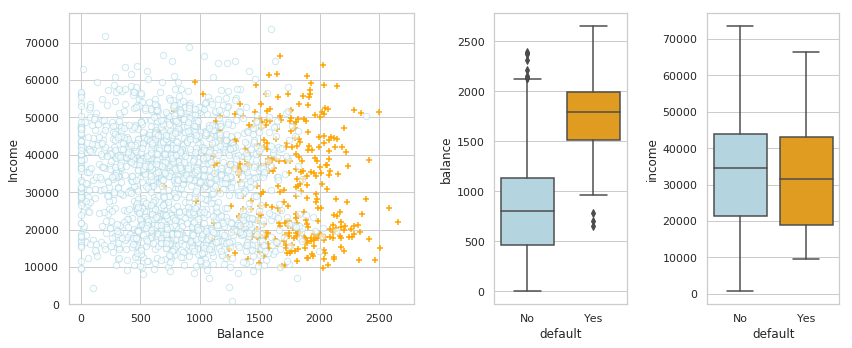

In [7]:
fig = plt.figure(figsize=(12, 5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,: -2])
ax2 = plt.subplot(gs[0, -2])
ax3 = plt.subplot(gs[0, -1])

# Take a fraction of the samples where target value (default) is 'No' to prevent overplotting
default_no = default[default['default'] == 'No'].sample(frac=0.15)

# Take all samples  where target value is 'Yes'
default_yes = default[default['default'] == 'Yes']

default_ = default_no.append(default_yes)

ax1.scatter(default_[default_['default'] == 'Yes'].balance,
            default_[default_['default'] == 'Yes'].income,
            s=40, c='orange', marker='+', linewidths=1)
ax1.scatter(default_[default_['default'] == 'No'].balance,
            default_[default_['default'] == 'No'].income,
            s=40, marker='o', linewidths='1', edgecolors='lightblue', facecolors='white', alpha=.6)

ax1.set_ylim(bottom=0)
ax1.set_ylabel('Income')
ax1.set_xlim(left=-100)
ax1.set_xlabel('Balance')

c_palette = {'No':'lightblue', 'Yes':'orange'}

sns.boxplot('default', 'balance', data=default, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('default', 'income', data=default, orient='v', ax=ax3, palette=c_palette)

gs.tight_layout(plt.gcf())

## PAGE 131

### Figure 4.2

In [8]:
# The factorize() method returns two objects: a label array and an array with the unique values.
# We are only interested in the first object.

default['default2'] = default['default'].factorize()[0]
default.iloc[2000:2005, ] # sample

,default,student,balance,income,default2
2001,No,No,1139.567166,36363.624804,0
2002,No,Yes,344.522897,21341.653838,0
2003,Yes,No,2005.575128,36636.008594,1
2004,No,No,1391.033809,51881.818673,0
2005,No,No,1338.884597,32500.584874,0


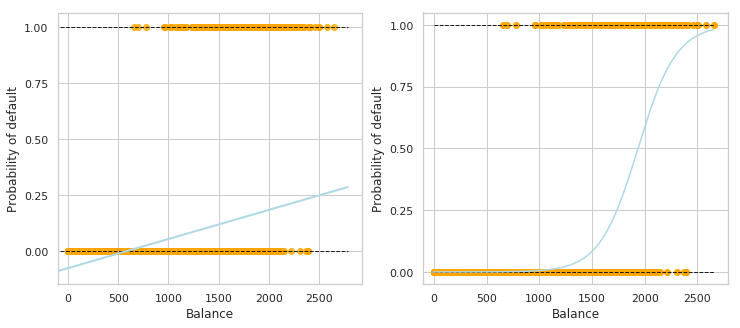

In [9]:
X_train = default.balance.values.reshape(-1,1) 
y = default.default2

# Create array of test data. Calculate the classification probability
# and predicted classification.
X_test = np.arange(default.balance.min(), default.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot
sns.regplot(default.balance, default.default2, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2}, ax=ax1)
# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(left=-100)

## PAGE 134

### Table 4.1

In [10]:
y = default['default2']

#### > scikit learn

In [11]:
# Using newton-cg solver, the coefficients are equal/closest to the ones in the book. 
clf = skl_lm.LogisticRegression(solver='newton-cg')
X_train = default['balance'].values.reshape(-1,1)
clf.fit(X_train, y)

print(clf)
print()
print('classes      :', clf.classes_)
print('coefficients :', clf.coef_)
print('intercept    :', clf.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

classes      : [0 1]
coefficients : [[0.00549892]]
intercept    : [-10.65133019]


#### > statsmodels

In [12]:
X_train = sm.add_constant(default['balance'].values)
est = smf.Logit(y.ravel(), X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
x1,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


## PAGE 135

### Table 4.2

In [13]:
default['student2'] = default['student'].factorize()[0]

In [14]:
X_train = sm.add_constant(default['student2'].values)
y = default['default2']

est = smf.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.504128,0.070713,-49.554094,0.000000,-3.642723,-3.365532
x1,0.404887,0.115019,3.520177,0.000431,0.179454,0.630320


## PAGE 136

### Table 4.3

In [15]:
X_train = default[['balance', 'income', 'student2']].copy()
X_train['intercept'] = 1 # add constant
est = smf.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student2,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721
intercept,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209


## PAGE 137

### Figure 4.3

In [16]:
# balance and default vectors for students
X_train = default[default['student'] == 'Yes'].balance.values.reshape(default[default['student'] == 'Yes'].balance.size, 1) 
y = default[default['student'] == 'Yes'].default2

# balance and default vectors for non-students
X_train2 = default[default['student'] == 'No'].balance.values.reshape(default[default['student'] == 'No'].balance.size, 1) 
y2 = default[default['student'] == 'No'].default2

# Vector with balance values for plotting
X_test = np.arange(default['balance'].min(), default['balance'].max()).reshape(-1, 1)

clf = skl_lm.LogisticRegression(solver='lbfgs')
clf2 = skl_lm.LogisticRegression(solver='lbfgs')

clf.fit(X_train,y)
clf2.fit(X_train2, y2)

prob = clf.predict_proba(X_test)
prob2 = clf2.predict_proba(X_test)

In [17]:
default.groupby(['student','default']).size().unstack('default')

default,No,Yes
student,,
No,6850,206
Yes,2817,127


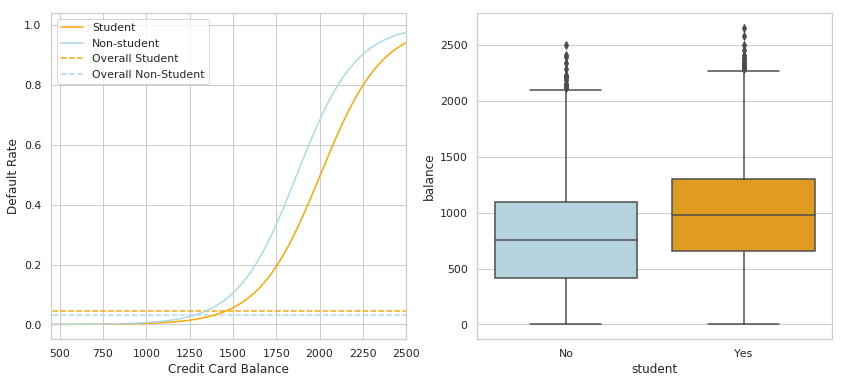

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Left plot
ax1.plot(X_test, pd.DataFrame(prob)[1], color='orange', label='Student')
ax1.plot(X_test, pd.DataFrame(prob2)[1], color='lightblue', label='Non-student')
ax1.hlines(127/2817, colors='orange', label='Overall Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(206/6850, colors='lightblue', label='Overall Non-Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_xlim(450,2500)
ax1.legend(loc=2)

# Right plot
sns.boxplot('student', 'balance', data=default, orient='v', ax=ax2,  palette=c_palette);

## PAGE 145

### Table 4.4

In [19]:
X = default[['balance', 'income', 'student2']].values
y = default['default2'].values

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

df_ = pd.DataFrame({'True default status': y, 'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9645,254
Yes,22,79


In [20]:
print(classification_report(y, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.36       333

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



## PAGE 146

### Table 4.5

In [21]:
decision_prob = 0.2
y_prob = lda.fit(X, y).predict_proba(X)

default_ = pd.DataFrame({'True default status': y, 'Predicted default status': y_prob[:, 1] > decision_prob})
default_.replace(to_replace={0: 'No', 1: 'Yes', 'True': 'Yes', 'False': 'No'}, inplace=True)

default_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9435,140
Yes,232,193


## 4.6 Lab: Logistic Regression, LDA, QDA, and KNN

### 4.6.1 The Stock Market Data

In [22]:
smarket = pd.read_csv('data/smarket.csv', index_col=0)
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [23]:
# R: names(smarket)
smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [24]:
# R: dim(smarket)
smarket.shape

(1250, 9)

In [25]:
# R: summary(smarket)
smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


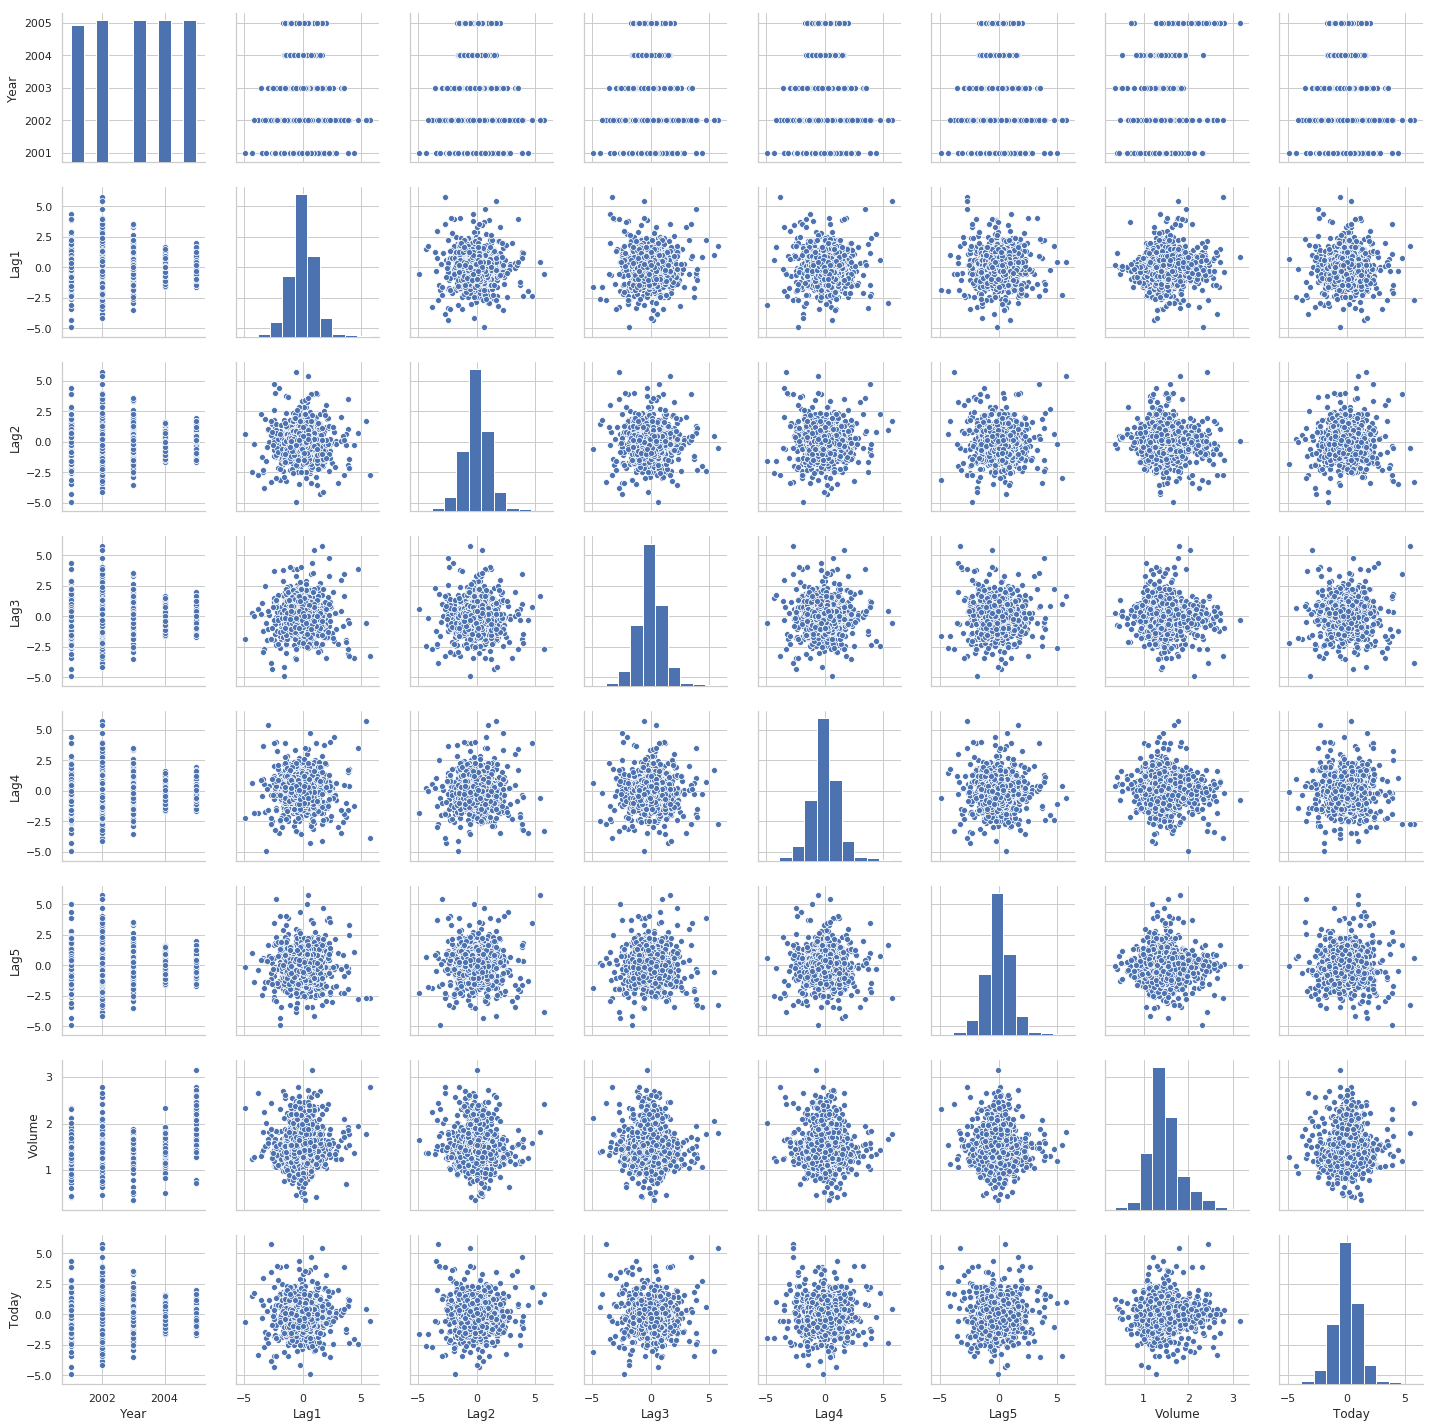

In [26]:
# pairs(smarket)
sns.pairplot(smarket)
plt.show()

In [27]:
# R: cor(smarket[, -9]) --> cor(smarket) returns an error in R
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


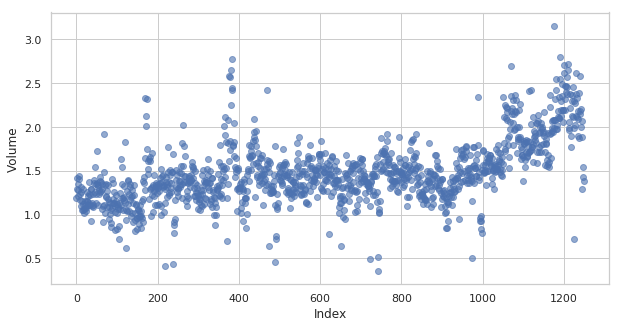

In [28]:
# R: attach(smarket)
# R: plot(Volume)
plt.figure(figsize=(10, 5))
plt.scatter(x=list(range(smarket.shape[0])), y=smarket['Volume'], alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Volume')
plt.show()

### 4.6.2 Logistic Regression

In [29]:
smarket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 137.7+ KB


In [30]:
y = smarket['Direction'].map({'Down':0, 'Up':1})
X_train = smarket.loc[:, 'Lag1':'Volume']
X_train['Intercept'] = 1

# R: glm.fit = glm(Direction~Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data=Smarket, family=binomial)
est = smf.Logit(y.ravel(), X_train).fit()

# R: summary(glm.fit)
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Lag1,-0.073074,0.050168,-1.456583,0.145232,-0.171401,0.025254
Lag2,-0.042301,0.050086,-0.844568,0.398352,-0.140469,0.055866
Lag3,0.011085,0.049939,0.221974,0.824334,-0.086793,0.108963
Lag4,0.009359,0.049974,0.187275,0.851445,-0.088589,0.107307
Lag5,0.010313,0.049512,0.208296,0.834998,-0.086728,0.107354
Volume,0.135441,0.158361,0.855266,0.392404,-0.174941,0.445822
Intercept,-0.126000,0.240737,-0.523394,0.600700,-0.597836,0.345836


In [31]:
# R: coef(glm.fit)
est.params

Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
Intercept   -0.126000
dtype: float64

In [32]:
# R: glm.probs = predict(glm.fit, type="response")
# R: glm.probs[1:10]
est.predict()[:10]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116,
       0.50695646, 0.49265087, 0.50922916, 0.51761353, 0.48883778])

## 4.7 Exercises

### Exercise 1

Let $Z=e^{\beta_0+\beta_1X}$,

Equation (4.2) becomes:

$p(X) = \frac{Z}{1+Z}$
 
$\Leftrightarrow \frac{1}{p(X)} = \frac{1+Z}{Z}$

$\Leftrightarrow \frac{1}{p(X)} = 1+\frac{1}{Z}$
 
$\Leftrightarrow Z = \frac{1}{\frac{1}{p(X)}-1}$

$\Leftrightarrow Z = \frac{1}{\frac{1-p(X)}{p(X)}}$

$\Leftrightarrow Z = \frac{p(X)}{1-p(X)}$

### Exercise 2

Equation (4.12): $p_k(x) = \frac {\pi_k \frac {1} {\sqrt{2 \pi} \sigma} \exp(- \frac {1} {2 \sigma^2} (x - \mu_k)^2) } {\sum { \pi_l \frac {1} {\sqrt{2 \pi} \sigma} \exp(- \frac {1} {2 \sigma^2} (x - \mu_l)^2) }}$

Substitute $C = \frac { \frac {1} {\sqrt{2 \pi} \sigma} \exp(- \frac {1} {2 \sigma^2} (x^2)) } {\sum { \pi_l \frac {1} {\sqrt{2 \pi} \sigma} \exp(- \frac {1} {2 \sigma^2} (x - \mu_l)^2) }}$ as this term does not vary across $k$

  __Step 1:__ Equation becomes $p_k(x) = C \pi_k \exp(- \frac {1} {2 \sigma^2} (\mu_k^2 - 2x \mu_k))$
  
  __Step 2:__ Take log of both sides $log(p_k(x)) = log(C) + log(\pi_k) + (- \frac {1} {2 \sigma^2} (\mu_k^2 - 2x \mu_k))$
  
  __Step 3:__ Simplify and rearrange $log(p_k(x)) =  (\frac {2x \mu_k} {2 \sigma^2} -\frac {\mu_k^2} {2 \sigma^2}) + log(\pi_k) + log(C)$

### Exercise 3

If $\sigma$ varies by $k$ then Equation (4.12) becomes: $p_k(x) = \frac {\pi_k \frac {1} {\sqrt{2 \pi} \sigma_k} \exp(- \frac {1} {2 \sigma_k^2} (x - \mu_k)^2) } {\sum { \pi_l \frac {1} {\sqrt{2 \pi} \sigma_k} \exp(- \frac {1} {2 \sigma_k^2} (x - \mu_l)^2) }}$

The constant term that does not vary by $k$ becomes $C' = \frac { \frac {1} {\sqrt{2 \pi}}} {\sum { \pi_l \frac {1} {\sqrt{2 \pi} \sigma_k} \exp(- \frac {1} {2 \sigma_k^2} (x - \mu_l)^2) }}$

  __Step 1:__ Equation becomes $p_k(x) = C' \frac{\pi_k}{\sigma_k} \exp(- \frac {1} {2 \sigma_k^2} (x - \mu_k)^2)$
  
  __Step 2:__ Take log of both sides $log(p_k(x)) = log(C') + log(\pi_k) - log(\sigma_k) + (- \frac {1} {2 \sigma_k^2} (x - \mu_k)^2)$
  
  __Step 3:__ Simplify and rearrange $log(p_k(x)) = (- \frac {1} {2 \sigma_k^2} (x^2 + \mu_k^2 - 2x\mu_k)) + log(\pi_k) - log(\sigma_k) + log(C')$
  
There's the $x^2$.

### Exercise 4a

If $X$ is uniformly distributed, then $(0.65 - 0.55) / (1-0) = 10\%$

### Exercise 4b

For two features, $10\% \times 10\% = 1\%$

### Exercise 4c

For 100 features, $10\%^{100}=$ _a very small number_

### Exercise 4d

When there are a large number of dimensions, the percentage of observations that can be used to predict with KNN becomes very small. This means that for a set sample size, more features leads to fewer neighbors.

### Exercise 4e

* For p=1, side = $0.1^{(1/1)} = 0.1$
* For p=2, side = $0.1^{(1/2)} = 0.316$
* For p=100, side = $0.1^{(1/100)} = 0.977$

This is saying that when the number of features is high (i.e. p=100), to use on average 10% of the training observations would mean that we would need to include almost the entire range of each individual feature.

### Exercise 5a

If the actual decision boundary is linear, then we would expect LDA to perform better on the test set. For the training set, QDA has a chance of performing better if it overfits.

### Exercise 5b

QDA would likely perform better on both the training set and the test set.

### Exercise 5c

In general a large sample size is more beneficial for QDA so would expect QDA accuracy to increase more than LDA.

### Exercise 5d

FALSE: We might achieve a better error rate on the training set but not on the test set because if the true decision boundary is linear then the QDA is not flexible in any predictive way.

### Exercise 6a

For logistic regression, $p(X) = \frac{e^{\beta_0+\beta_1 X_1+\beta_2 X_2}}{1+e^{\beta_0+\beta_1 X_1+\beta_2 X_2}}$

Plugging in the values $p(X) = \frac{e^{-6 + 0.05 \times 40 + 1 \times 3.5}}{1+e^{-6+0.05 \times 40 + 1 \times 3.5}} = 0.3775$

In [33]:
np.exp(-6 + 0.05*40 + 1*3.5) / (1 + np.exp(-6 + 0.05*40 + 1*3.5)) 

0.37754066879814546

### Exercise 6b

Solve this equation $0.5 = \frac{e^{-6 + 0.05 X_1 + 1 \times 3.5}}{1+e^{-6+0.05 X_1 + 1 \times 3.5}}$

Which equates to solving the logit equation $log(\frac{0.5}{1-0.5}) = -6 + 0.05 X_1 + 1 \times 3.5$

Solve this equation $0.5 = \frac{e^{-6 + 0.05 X_1 + 1 \times 3.5}}{1+e^{-6+0.05 X_1 + 1 \times 3.5}}$

Which equates to solving the logit equation $log(\frac{0.5}{1-0.5}) = -6 + 0.05 X_1 + 1 \times 3.5$

$log(\frac{0.5}{1-0.5}) = -6 + 0.05 X_1 + 1 \times 3.5$

$\Leftrightarrow log(\frac{0.5}{1-0.5}) + 6 = 0.05 X_1 + 1 \times 3.5$

$\Leftrightarrow log(\frac{0.5}{1-0.5}) + 6 - 1 \times 3.5 = 0.05 X_1$

$\Leftrightarrow \frac{log(\frac{0.5}{1-0.5}) + 6 - 1 \times 3.5}{0.05} = X_1$

$\Leftrightarrow X_1 = \frac{log(\frac{0.5}{1-0.5}) + 6 - 1 \times 3.5}{0.05}$

$\Leftrightarrow X_1 = 50.0$

In [34]:
(np.log(0.5/(1-0.5)) + 6 - 3.5*1) / 0.05

50.0

### Exercise 7

For constant variance, $p_k(x) = \frac {\pi_k \frac {1} {\sqrt{2 \pi} \sigma} \exp(- \frac {1} {2 \sigma^2} (x - \mu_k)^2) } {\sum { \pi_l \frac {1} {\sqrt{2 \pi} \sigma} \exp(- \frac {1} {2 \sigma^2} (x - \mu_l)^2) }}$

Evaluating this becomes $p_{yes}(4) = \frac {0.8 \exp(- \frac {1} {2 \times 36} (4 - 10)^2)} {0.8 \exp(- \frac {1} {2 \times 36} (4 - 10)^2) + (1-0.8) \exp(- \frac {1} {2 \times 36} (4 - 0)^2)}$

In [35]:
(0.8*np.exp(-1/(2*36)*(4-10)**2)) / (0.8*np.exp(-1/(2*36)*(4-10)**2) + (1-0.8)*np.exp(-1/(2*36)*(4-0)**2))

0.7518524532975261

### Exercise 8

There's not enough information to say which method is better. With such a high error rate for the logistic regression, it's possible that the true decision boundary is not linear, so KNN=1 might have a better fit. On the other hand, KNN=1 has a high propensity to overfit. With KNN=1 having an average error of 18%, it's possible that the training error is close to 0% and the test error is more than 30%. If we are selecting the model with only error rate data, then we want to know which model has the lower __test__ error rate.

### Exercise 9a

We want to solve $0.37 = \frac{p_{default}}{1-p_{default}}$

Rearranging, this becomes $\frac{1}{0.37} = \frac{1-p_{default}}{p_{default}} = \frac{1}{p_{default}}-1$

Finally $p_{default} = \frac{1}{\frac{1}{0.37}+1}$

In [36]:
1/(1/0.37+1)

0.27007299270072993

Probability of default is 27.0%

### Exercise 9b

In [37]:
0.16/(1-0.16)

0.1904761904761905

Odds of defaulting is 0.19

### Exercise 10

In [38]:
weekly = pd.read_csv('data/weekly.csv', index_col=0)
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


### Exercise 10a

In [39]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


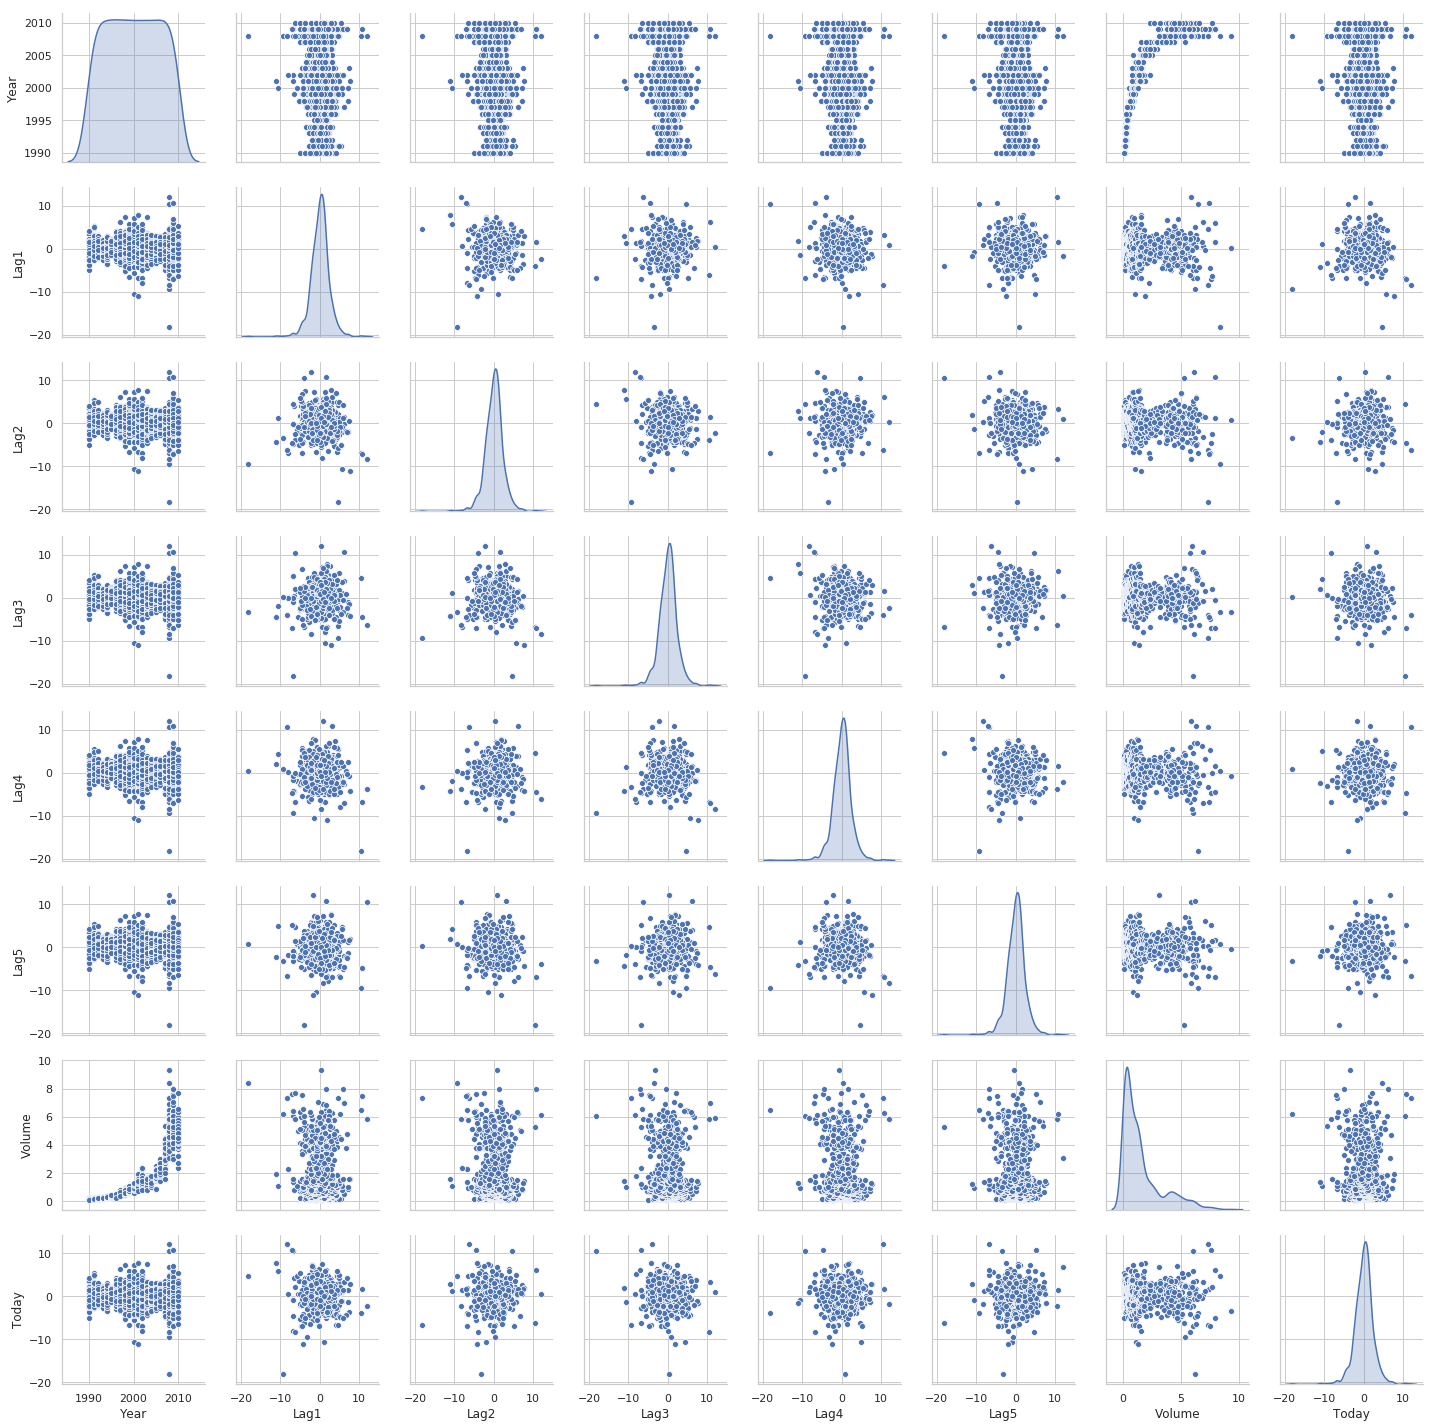

In [40]:
sns.pairplot(weekly, diag_kind='kde')
plt.show()

### Exercise 10b

In [41]:
y = weekly['Direction'].map({'Down':0, 'Up':1})
X_train = weekly.loc[:, 'Lag1':'Volume']
X_train['Intercept'] = 1

est = smf.Logit(y.ravel(), X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Lag1,-0.041269,0.026410,-1.562610,0.118144,-0.093032,0.010494
Lag2,0.058442,0.026865,2.175384,0.029601,0.005787,0.111096
Lag3,-0.016061,0.026663,-0.602376,0.546924,-0.068320,0.036197
Lag4,-0.027790,0.026463,-1.050141,0.293653,-0.079657,0.024077
Lag5,-0.014472,0.026385,-0.548501,0.583348,-0.066185,0.037241
Volume,-0.022742,0.036898,-0.616333,0.537675,-0.095061,0.049577
Intercept,0.266864,0.085930,3.105613,0.001899,0.098445,0.435283


`Lag2` seems to have statistically significant predictive value

### Exercise 10c

In [42]:
est.pred_table(threshold=0.5)

array([[ 54., 430.],
       [ 48., 557.]])

In [43]:
# Accuracy
(54 + 557) / weekly.shape[0]

0.5610651974288338

* When prediction is "Down", model is right $\frac{54}{54 + 48} = 52.9\%$
* When prediction is "Up", model is right $\frac{557}{430 + 557} = 56.4\%$

Model is has higher accuracy when the prediction is "Up"

### Exercise 10d

In [44]:
filter = weekly['Year'] <= 2008

In [45]:
X_train = weekly.loc[filter, ['Lag2']]
y_train = weekly.loc[filter, 'Direction'].map({'Down':0, 'Up':1})

In [46]:
X_test = weekly.loc[~filter, ['Lag2']]
y_test = weekly.loc[~filter, 'Direction'].map({'Down':0, 'Up':1})

In [47]:
clf = skl_lm.LogisticRegression(solver='lbfgs')

In [48]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
y_pred = clf.predict(X_test)

In [50]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.625


In [51]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 9 34]
 [ 5 56]]


### Exercise 10e

In [52]:
clf = LinearDiscriminantAnalysis()

In [53]:
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [54]:
y_pred = clf.predict(X_test)

In [55]:
print('Accuracy of Linear Discriminant Analysis classifier on test set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of Linear Discriminant Analysis classifier on test set: 0.625


In [56]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 9 34]
 [ 5 56]]


### Exercise 10f

In [57]:
clf = QuadraticDiscriminantAnalysis()

In [58]:
clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [59]:
y_pred = clf.predict(X_test)

In [60]:
print('Accuracy of Quadratic Discriminant Analysis classifier on test set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of Quadratic Discriminant Analysis classifier on test set: 0.587


In [61]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0 43]
 [ 0 61]]


### Exercise 10g

In [62]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)

In [63]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [64]:
y_pred = clf.predict(X_test)

In [65]:
print('Accuracy of KNN classifier on test set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.490


In [66]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[21 22]
 [31 30]]


### Exercise 10h

The Logistic Regression and Linear Discriminant Analysis models produced the best results

### Exercise 10i

In [67]:
for k in list(range(1, 10)) + list(range(10, 201, 10)):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy of KNN classifier with {} neighbors on test set: {:.2f}'.format(k, clf.score(X_test, y_test)))

Accuracy of KNN classifier with 1 neighbors on test set: 0.49
Accuracy of KNN classifier with 2 neighbors on test set: 0.47
Accuracy of KNN classifier with 3 neighbors on test set: 0.54
Accuracy of KNN classifier with 4 neighbors on test set: 0.58
Accuracy of KNN classifier with 5 neighbors on test set: 0.53
Accuracy of KNN classifier with 6 neighbors on test set: 0.53
Accuracy of KNN classifier with 7 neighbors on test set: 0.55
Accuracy of KNN classifier with 8 neighbors on test set: 0.54
Accuracy of KNN classifier with 9 neighbors on test set: 0.55
Accuracy of KNN classifier with 10 neighbors on test set: 0.57
Accuracy of KNN classifier with 20 neighbors on test set: 0.60
Accuracy of KNN classifier with 30 neighbors on test set: 0.53
Accuracy of KNN classifier with 40 neighbors on test set: 0.57
Accuracy of KNN classifier with 50 neighbors on test set: 0.57
Accuracy of KNN classifier with 60 neighbors on test set: 0.58
Accuracy of KNN classifier with 70 neighbors on test set: 0.55
A

### Exercise 11a

In [68]:
auto = pd.read_csv('data/auto.csv', index_col=0)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [69]:
mpg01 = np.where(auto.mpg > auto.mpg.median(), 1, 0)

In [70]:
auto['mpg01'] = mpg01
auto.sample(n=5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
176,29.0,4,90.0,70,1937,14.0,75,2,volkswagen rabbit,1
275,20.3,5,131.0,103,2830,15.9,78,2,audi 5000,0
50,23.0,4,122.0,86,2220,14.0,71,1,mercury capri 2000,1
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
46,18.0,6,258.0,110,2962,13.5,71,1,amc hornet sportabout (sw),0


### Exercise 11b

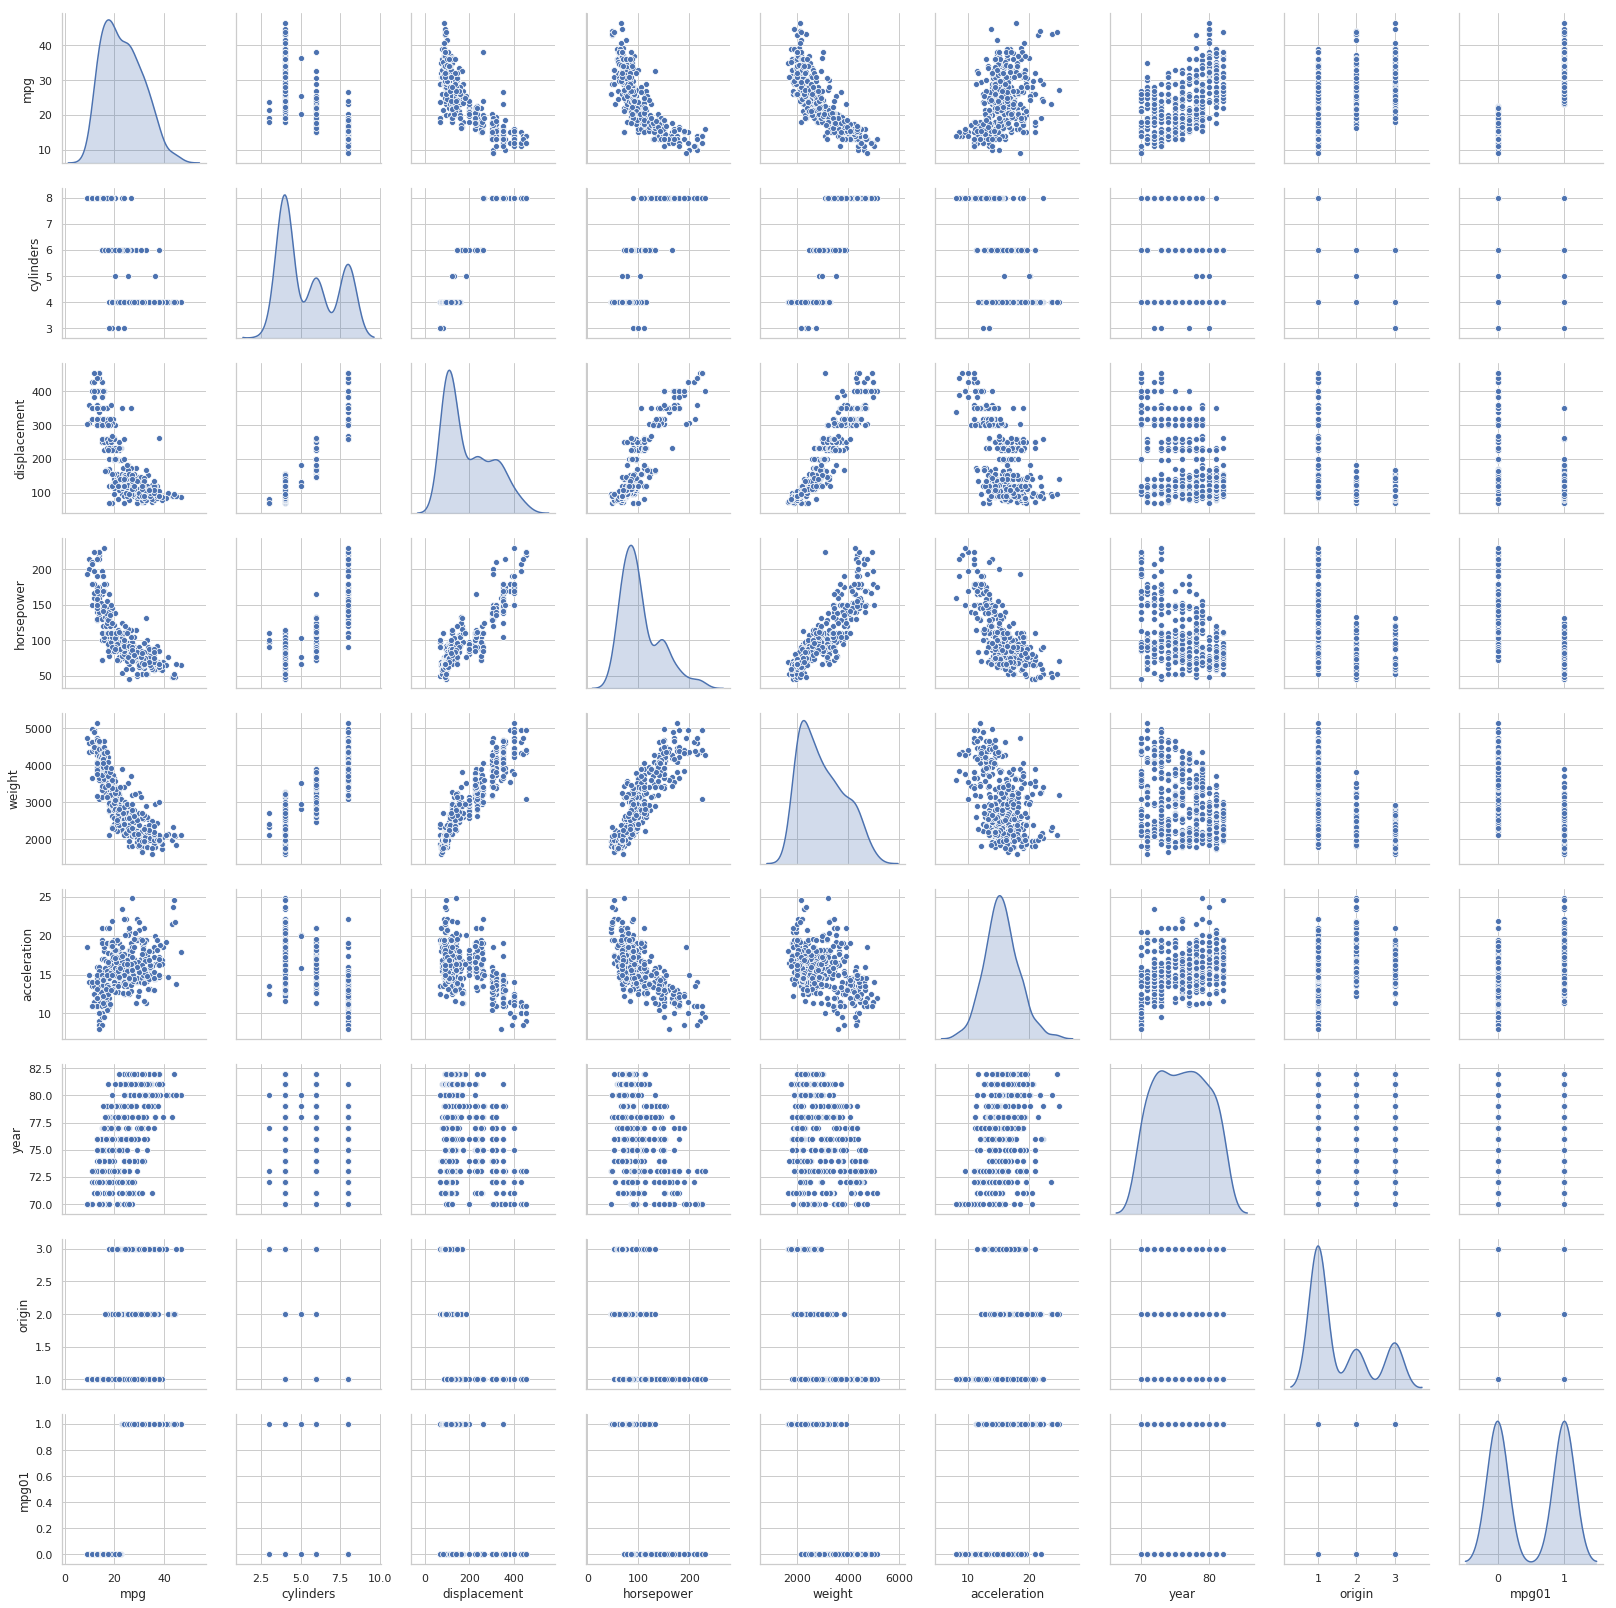

In [71]:
sns.pairplot(auto, diag_kind='kde')
plt.show()

`displacement`, `horsepower`, `weight` and `acceleration` seem to be highly correlated to `mpg01`.

### Exercise 11c

In [72]:
y = auto['mpg01']
X = auto.loc[:, 'displacement':'acceleration']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Exercise 11d

In [74]:
clf = LinearDiscriminantAnalysis()

In [75]:
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [76]:
y_pred = clf.predict(X_test)

In [77]:
print('Accuracy of Linear Discriminant Analysis classifier on test set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of Linear Discriminant Analysis classifier on test set: 0.839


In [78]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[46 19]
 [ 0 53]]


### Exercise 11e

In [79]:
clf = QuadraticDiscriminantAnalysis()

In [80]:
clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [81]:
y_pred = clf.predict(X_test)

In [82]:
print('Accuracy of Quadratic Discriminant Analysis classifier on test set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of Quadratic Discriminant Analysis classifier on test set: 0.831


In [83]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[46 19]
 [ 1 52]]


### Exercise 11f

In [84]:
clf = skl_lm.LogisticRegression(solver='lbfgs')

In [85]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
y_pred = clf.predict(X_test)

In [87]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.856


In [88]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[49 16]
 [ 1 52]]


### Exercise 11g

In [89]:
for k in list(range(1, 10)):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy of KNN classifier with {} neighbors on test set: {:.3f}'.format(k, clf.score(X_test, y_test)))

Accuracy of KNN classifier with 1 neighbors on test set: 0.847
Accuracy of KNN classifier with 2 neighbors on test set: 0.847
Accuracy of KNN classifier with 3 neighbors on test set: 0.864
Accuracy of KNN classifier with 4 neighbors on test set: 0.856
Accuracy of KNN classifier with 5 neighbors on test set: 0.839
Accuracy of KNN classifier with 6 neighbors on test set: 0.847
Accuracy of KNN classifier with 7 neighbors on test set: 0.831
Accuracy of KNN classifier with 8 neighbors on test set: 0.831
Accuracy of KNN classifier with 9 neighbors on test set: 0.831


In [90]:
k = 3

In [91]:
clf = neighbors.KNeighborsClassifier(n_neighbors=k)

In [92]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [93]:
y_pred = clf.predict(X_test)

In [94]:
print('Accuracy of KNN classifier on test set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.864


In [95]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50 15]
 [ 1 52]]


### Exercise 12a

In [96]:
def Power(x):
    print(x**2)

In [97]:
Power(3)

9


### Exercise 12b

In [98]:
def Power2(x, y):
    print(x**y)

In [99]:
Power2(3, 8)

6561


### Exercise 12c

In [100]:
Power2(10, 3)

1000


In [101]:
Power2(8, 17)

2251799813685248


In [102]:
Power2(131, 3)

2248091


### Exercise 12d

In [103]:
def Power3(x, y):
    return x**y

In [104]:
Power3(3, 8)

6561

### Exercise 12e

In [105]:
x = np.arange(1, 11)
y = Power3(x, 2)

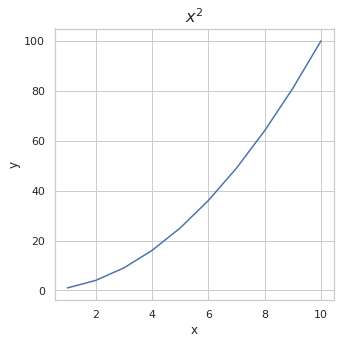

In [106]:
fig = plt.figure(figsize=(5, 5))
plt.plot(x, y)
plt.title('$x^2$', fontsize=16)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

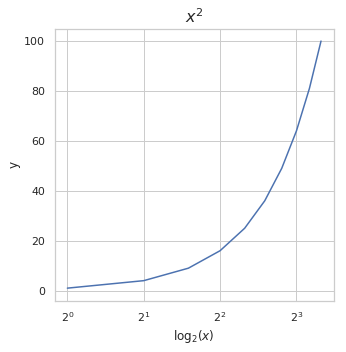

In [107]:
fig = plt.figure(figsize=(5, 5))
plt.semilogx(x, y, basex=2)
plt.title('$x^2$', fontsize=16)
plt.xlabel('$\log_2(x)$')
plt.ylabel('y')
plt.show()

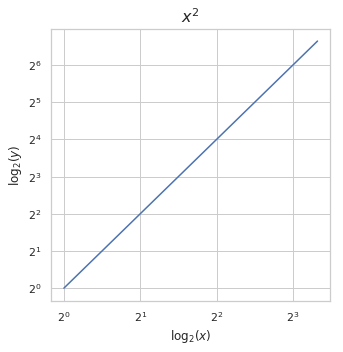

In [108]:
fig = plt.figure(figsize=(5, 5))
plt.loglog(x, y, basex=2, basey=2)
plt.title('$x^2$', fontsize=16)
plt.xlabel('$\log_2(x)$')
plt.ylabel('$\log_2(y)$')
plt.show()

### Exercise 12f

In [109]:
def PlotPower(x_min, x_max, power):
    x = np.arange(x_min, x_max+1)
    y = x**power
    fig = plt.figure(figsize=(5, 5))
    plt.plot(x, y)
    plt.title('$x^{}$'.format(power), fontsize=16)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

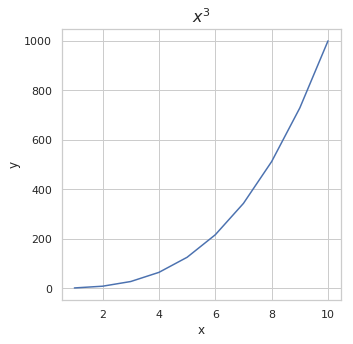

In [110]:
PlotPower(1, 10, 3)

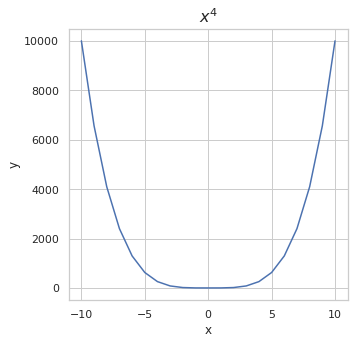

In [111]:
PlotPower(-10, 10, 4)

Sources:
* [https://github.com/yahwes/ISLR](https://github.com/yahwes/ISLR)
* [https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034](https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034)
* [https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)
* [https://machinelearningmastery.com](https://machinelearningmastery.com)
* [https://github.com/JWarmenhoven/ISLR-python](https://github.com/JWarmenhoven/ISLR-python)
* [https://www.statsmodels.org/stable/graphics.html](https://www.statsmodels.org/stable/graphics.html)